# Data Gathering

In [3]:
import pandas as pd
import numpy as np

In [29]:
import json

# Enter your keys/secrets as strings in the following fields
credentials = {}  
credentials['CONSUMER_KEY'] = 'Kiy6NRGCfVjKbHJGS5S7cQWAC'  
credentials['CONSUMER_SECRET'] = 'jypnrUKv4rcNVgQ6HLgo0TNJHaNKIdd7KPvY2j6OfQXT3c0zap'  
credentials['ACCESS_TOKEN'] = '1493700385-ZJISpm8q1GzLNHj5Uy0Oom84mKdl8Mql66Qi30h'  
credentials['ACCESS_SECRET'] = 'HVDsTxtJJz0rSPp7VHnZ3u5uLoyzYN77bPRXzRZ96TEt3'

# Save the credentials object to file
with open("twitter_credentials.json", "w") as file:  
    json.dump(credentials, file)

In [30]:
# Import the Twython class
from twython import Twython  
import json

# Load credentials from json file
with open("twitter_credentials.json", "r") as file:  
    creds = json.load(file)

# Instantiate an object
python_tweets = Twython(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'])

In [31]:
from twython import Twython
twitter = Twython(credentials['CONSUMER_KEY'], credentials['CONSUMER_SECRET'],
                  credentials['ACCESS_TOKEN'], credentials['ACCESS_SECRET'])

In [ ]:
twitter.verify_credentials()

In [34]:
twitter.search(q='pseg power outage')

{'statuses': [{'created_at': 'Mon Apr 15 23:50:33 +0000 2019',
   'id': 1117938289485537281,
   'id_str': '1117938289485537281',
   'text': 'RT @NJFires: Livingston Power Outage  N. Baums CT  2 Poles and Tree down on wires and on fire. Wind Storm. FD and PSEG mark out on scene.…',
   'truncated': False,
   'entities': {'hashtags': [],
    'symbols': [],
    'user_mentions': [{'screen_name': 'NJFires',
      'name': 'NorthJersey FireNews',
      'id': 3056320675,
      'id_str': '3056320675',
      'indices': [3, 11]}],
    'urls': []},
   'metadata': {'iso_language_code': 'en', 'result_type': 'recent'},
   'source': '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>',
   'in_reply_to_status_id': None,
   'in_reply_to_status_id_str': None,
   'in_reply_to_user_id': None,
   'in_reply_to_user_id_str': None,
   'in_reply_to_screen_name': None,
   'user': {'id': 2369438977,
    'id_str': '2369438977',
    'name': 'bay/SHOREsource',
    'screen_name': 'SHORE

In [24]:
from twython import TwythonStreamer  
import csv

# Filter out unwanted data
def process_tweet(tweet):  
    d = {}
    d['hashtags'] = [hashtag['text'] for hashtag in tweet['entities']['hashtags']]
    d['text'] = tweet['text']
    d['user'] = tweet['user']['screen_name']
    d['user_loc'] = tweet['user']['location']
    return d


# Create a class that inherits TwythonStreamer
class MyStreamer(TwythonStreamer):     

    # Received data
    def on_success(self, data):

        # Only collect tweets in English
        if data['lang'] == 'en':
            tweet_data = process_tweet(data)
            self.save_to_csv(tweet_data)

    # Problem with the API
    def on_error(self, status_code, data):
        print(status_code, data)
        self.disconnect()

    # Save each tweet to csv file
    def save_to_csv(self, tweet):
        with open(r'saved_tweets.csv', 'a') as file:
            writer = csv.writer(file)
            writer.writerow(list(tweet.values()))

In [ ]:
stream = MyStreamer(creds['CONSUMER_KEY'], creds['CONSUMER_SECRET'],  
                    creds['ACCESS_TOKEN'], creds['ACCESS_SECRET'])
# Start the stream
stream.statuses.filter(track='power outage')  

In [3]:
import tweepy as tw

auth = tw.OAuthHandler(credentials['CONSUMER_KEY'], credentials['CONSUMER_SECRET'])
auth.set_access_token(credentials['ACCESS_TOKEN'], credentials['ACCESS_SECRET'])

api = tw.API(auth)

In [4]:
search_words = 'power outage'
date_since = "2019-04-09"

In [10]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(20)

In [84]:
data = []
for tweet in tweets:
    content = {}
    content['tweets'] = tweet.text
    content['location'] = tweet.user.location
    content['date'] = tweet.created_at
    data.append(content)
    
df = pd.DataFrame(data)

In [85]:
df

,date,location,tweets
0,2019-04-15 00:41:08,,"@CornBeltEnergy power outage in Downs, Il. 7:30pm"
1,2019-04-15 00:40:23,,@MauiElectric power outage upcountry??
2,2019-04-15 00:40:13,"Knoxville, TN",When @davidking08 breaks the power outage news...
3,2019-04-15 00:37:53,,4-14-2019 @ 8:35 pm \n\nPower outage on Highwa...
4,2019-04-15 00:37:53,Athens,RT @TheAthensNEWS: Two trees were downed on Co...
5,2019-04-15 00:36:26,New York,"RT @bebarce: Hi all,\n\nJust putting it out th..."
6,2019-04-15 00:36:25,United States,@KnoxKUB &amp; @MayorRogero your power infrast...
7,2019-04-15 00:35:13,Coastal Jersey...in the sand,We had a power outage....it's not working.... ...
8,2019-04-15 00:34:27,"Athens, Ohio",RT @TheAthensNEWS: Two trees were downed on Co...
9,2019-04-15 00:33:41,"Badstreet, USA","Power outage, day one: \n\nChild is bored and ..."


In [86]:
# saved dataframe to data directory
df.to_csv('./data/tweets.csv', index=False)

In [3]:
df = pd.read_csv('./data/tweets.csv')

In [4]:
df.head()

,date,location,tweets
0,2019-04-15 00:41:08,NaN,"@CornBeltEnergy power outage in Downs, Il. 7:30pm"
1,2019-04-15 00:40:23,NaN,@MauiElectric power outage upcountry??
2,2019-04-15 00:40:13,"Knoxville, TN",When @davidking08 breaks the power outage news...
3,2019-04-15 00:37:53,NaN,4-14-2019 @ 8:35 pm \n\nPower outage on Highwa...
4,2019-04-15 00:37:53,Athens,RT @TheAthensNEWS: Two trees were downed on Co...


In [5]:
df['tweets'][3]

'4-14-2019 @ 8:35 pm \n\nPower outage on Highway 589, 437, 172, Cindas Creek, &amp; Patoker area.\n\nServicemen are notified… https://t.co/vgfvd10qiP'

In [7]:
tweets = tw.Cursor(api.search,
              q=search_words,
              lang="en",
              since=date_since).items(180)

In [13]:
data_2 = []
for tweet in tweets:
    content_2 = {}
    content_2['tweets'] = tweet.text
    content_2['location'] = tweet.user.location
    content_2['date'] = tweet.created_at
    data_2.append(content_2)
    
df_2 = pd.DataFrame(data_2)

In [20]:
df_2

,date,location,tweets
0,2019-04-15 21:32:37,"Los Angeles, CA",RT @dog_feelings: the human likes to cover my ...
1,2019-04-15 21:32:30,,Power outage near Anaheim and Avalon
2,2019-04-15 21:32:13,1436 SE Powell :: 503-477-8380,"After a brief power outage today, we are back ..."
3,2019-04-15 21:31:31,"69 Voortrekker Road, Oudtshoor",There is an unexpected power outage in Colridg...
4,2019-04-15 21:21:28,"Edmonton, Alberta, Canada",ATCO Crews continue to work restoring power af...
5,2019-04-15 21:20:09,,RT @hydroottawa: Our crews are making progress...
6,2019-04-15 21:14:40,"Pennsylvania, USA",Well this explains our power outage! I took my...
7,2019-04-15 21:12:09,"Woden, Texas","This Week at Woden ISD\n(April 15, 2019)\nMond..."
8,2019-04-15 21:11:54,"Scranton, Pa.",Food safety in a power outage https://t.co/i3U...
9,2019-04-15 21:10:56,"Windsor, Ontario",RT @TownofLakeshore: Due to the extended Hydro...


In [32]:
df_2.to_csv('./data/tweets_2.csv', index=False)

In [31]:
df_2['tweets'][110]

'There was just a power outage in my area. I wonder how many people were as dumb as me and paid their bill because t… https://t.co/hVzwKv4xpS'

In [5]:
import time

In [8]:
data_3 = []
for tweet in tweets:
    content_3 = {}
    content_3['tweets'] = tweet.text
    content_3['location'] = tweet.user.location
    content_3['date'] = tweet.created_at
    data_3.append(content_3)
    
    time.sleep(5)
df_3 = pd.DataFrame(data_3)

In [13]:
df_3.head()

,date,location,tweets
0,2019-04-16 22:33:49,"Boulder, Colorado",@K1ngAnge1 Hi there! @CUBoulderFacMan is aware...
1,2019-04-16 22:32:51,,"art piece i worked on during our power outage,..."
2,2019-04-16 22:31:38,,RT @911onFOX: LA is facing a complete power ou...
3,2019-04-16 22:30:51,"Michigan, USA",@brooklynpeach They’re doing line work on M-50...
4,2019-04-16 22:30:14,"Federal Capital Territory, Nigeria",I can cry now...you know when you take so much...


In [17]:
df_3.to_csv('./data/tweets_3.csv')

In [28]:
set(df_2['location'])

{'',
 ' Mars',
 '.',
 '1436 SE Powell :: 503-477-8380',
 '330| where the sky ends',
 '38652',
 '69 Voortrekker Road, Oudtshoor',
 '750 Rt 36 Eatontown NJ 07724',
 '861 Silver Lake Blvd,Dover, DE',
 'Accra',
 'Akron, Ohio',
 'Alexandra, Victoria, Australia',
 'Atlanta',
 'Atlanta, GA',
 'Atlanta, Ga',
 'BLOOMFIELD HILLS, MICHIGAN',
 'Blue Bell, PA',
 'Boston, MA',
 'CJ CRAFT CORNER',
 'Cambridge, MA',
 'Canada',
 'Casselberry, FL',
 'Central Texas',
 'Chicago',
 'Choctaw, OK',
 'Clarks Summit, Pa',
 'Cleveland',
 'College Park, MD',
 'Colorado, USA',
 'Dallas, TX',
 'Delaware, USA',
 "Don Don's crib",
 'Dublin',
 'Dublin City, Ireland',
 'D〽️V',
 'Edmonton, Alberta, Canada',
 'Elk Grove Village, IL',
 'FarRight Cave',
 'Florida, USA',
 'Gotham City',
 'Greater Philadelphia Region',
 'Halton Hills, Ontario',
 'Hamilton, Ontario',
 'Hippieland ✌🏾',
 'Hocketown West, High 5 State',
 'Huntsville, TX',
 'INDIANA',
 'Idaho, USA',
 'In Gods Hands',
 'In an overpriced VIP section',
 'Italia',
 

In [ ]:
# for status in tw.Cursor(api.home_timeline).items(20):
#     # Process a single status
#     print(status.text)
#     print(status.geo)
#     print(type(status.created_at))
#     print(status.coordinates)

In [68]:
api.rate_limit_status()

{'rate_limit_context': {'access_token': '1493700385-ZJISpm8q1GzLNHj5Uy0Oom84mKdl8Mql66Qi30h'},
 'resources': {'lists': {'/lists/list': {'limit': 15,
    'remaining': 15,
    'reset': 1555258583},
   '/lists/memberships': {'limit': 75, 'remaining': 75, 'reset': 1555258583},
   '/lists/subscribers/show': {'limit': 15,
    'remaining': 15,
    'reset': 1555258583},
   '/lists/members': {'limit': 900, 'remaining': 900, 'reset': 1555258583},
   '/lists/subscriptions': {'limit': 15, 'remaining': 15, 'reset': 1555258583},
   '/lists/show': {'limit': 75, 'remaining': 75, 'reset': 1555258583},
   '/lists/ownerships': {'limit': 15, 'remaining': 15, 'reset': 1555258583},
   '/lists/subscribers': {'limit': 180, 'remaining': 180, 'reset': 1555258583},
   '/lists/members/show': {'limit': 15, 'remaining': 15, 'reset': 1555258583},
   '/lists/statuses': {'limit': 900, 'remaining': 900, 'reset': 1555258583}},
  'application': {'/application/rate_limit_status': {'limit': 180,
    'remaining': 179,
    '

In [2]:
from twitterscraper import query_tweets

In [12]:
import time 

data = []
for tweet in query_tweets('pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query', 10):
    print(tweet)
    tweets = {}
    tweets['userid'] = tweet.user.encode('utf-8')
    tweets['id'] = tweet.id
    tweets['date'] = tweet.timestamp
    tweets['tweet'] = tweet.text
    data.append(tweets)
    time.sleep(2)
    
df = pd.DataFrame(data)

INFO: queries: ['pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2006-03-21 until:2006-11-14', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2006-11-14 until:2007-07-11', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2007-07-11 until:2008-03-06', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2008-03-06 until:2008-10-30', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2008-10-30 until:2009-06-26', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2009-06-26 until:2010-02-20', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-12-31&src=typed_query since:2010-02-20 until:2010-10-16', 'pse

In [14]:
df.head()

,date,id,tweet,userid
0,2017-12-13 16:02:57,940975336996704256,There is a power outage on the North Side of M...,b'SayvilleRunning'
1,2017-12-04 02:15:17,937505557245775873,"At approximately 7:50 p.m. tonight, Prudential...",b'PruCenter'
2,2017-11-19 22:27:12,932374728085471233,That better be the last power outage this week...,b'chryslap'
3,2017-11-19 17:13:11,932295704164302850,There is a power outage in the area of Piermon...,b'HillsdaleOEMNJ'
4,2017-11-09 02:14:50,928445747963531264,Power outage AGAIN!!! 3 night in a row. PSEG,b'FaroudSadik'


In [15]:
df.shape

(400, 4)

In [16]:
df['tweet'][10]

'Another power outage in #JerseyCity....oh goody! This happens way more frequently than it should. #PSEG #Electricity #Utilities'

In [18]:
df.tail()

,date,id,tweet,userid
395,2017-09-29 16:47:08,913807366059110400,NotifyNYC: .PSEG responding to power outage in...,b'EastCoast911IA'
396,2017-09-29 16:46:18,913807157665071105,PSEG responding to power outage in Rockaway se...,b'LisaGRockaZumba'
397,2017-09-29 16:43:50,913806534496456709,.@PSEG responding to power outage in Rockaway ...,b'NotifyNYC'
398,2017-09-20 17:53:06,910562474956513281,"2,870 Affected By Power Outage In Glen Cove, M...",b'OysterBayPatch'
399,2017-09-20 15:46:35,910530636233900032,TEXT PSEG (Long Island)your power outage: 1st ...,b'1Electrician'


In [19]:
df.to_csv('./data/tweets_pseg_dec13_sep20.csv')

In [21]:
import time 

data_2 = []
for tweet in query_tweets('pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query', 20):
    print(tweet.text)
    print(tweet.timestamp)
    tweets_2 = {}
    tweets_2['userid'] = tweet.user.encode('utf-8')
    tweets_2['id'] = tweet.id
    tweets_2['date'] = tweet.timestamp
    tweets_2['tweet'] = tweet.text
    data_2.append(tweets_2)
    time.sleep(2)
    
df_2 = pd.DataFrame(data_2)

INFO: queries: ['pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2006-03-21 until:2006-11-14', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2006-11-14 until:2007-07-11', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2007-07-11 until:2008-03-06', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2008-03-06 until:2008-10-30', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2008-10-30 until:2009-06-26', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2009-06-26 until:2010-02-20', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-09-19&src=typed_query since:2010-02-20 until:2010-10-16', 'pse

Power Outage in Far Rockaway. 2300 PSEG customers affected by this @fox5ny @ABC7NY @NBCNews @PSEGNews @PSEGLI
2017-09-06 01:05:10
@1010WINS Far Rockaway Power Outage. 2300 customers from PSEG without power. You heard it here first
2017-09-06 01:01:14
PSEG has advised that there is a power outage in area of Grove and Preakness #Haledon
2017-08-29 12:47:13
Early morning Jersey City power outage caused by raccoon: PSEG https://buff.ly/2wbtvVf 
2017-08-25 19:48:00
#hudsonupdates Early morning Jersey City power outage caused by raccoon: PSEG http://dlvr.it/PhX2ds  #artusalawfirmpic.twitter.com/2yLKSDwAwb
2017-08-25 12:38:20
Early morning Jersey City power outage caused by raccoon: PSEG http://fb.me/6eoo3ngWW 
2017-08-25 12:38:19
Early morning Jersey City power outage caused by raccoon: PSEG #JerseyCity http://www.newslocker.com/en-us/region/jersey-city/early-morning-jersey-city-power-outage-caused-by-raccoon-pseg/ …
2017-08-24 19:59:11
Early morning Jersey City power outage caused by raccoo

In [22]:
df_2.head()

,date,id,tweet,userid
0,2017-09-06 01:05:10,905235393477529601,Power Outage in Far Rockaway. 2300 PSEG custom...,b'MrWillJHolla'
1,2017-09-06 01:01:14,905234403101696000,@1010WINS Far Rockaway Power Outage. 2300 cust...,b'MrWillJHolla'
2,2017-08-29 12:47:13,902512965592784896,PSEG has advised that there is a power outage ...,b'DomStampone'
3,2017-08-25 19:48:00,901169309602521088,Early morning Jersey City power outage caused ...,b'MylarSquirrel'
4,2017-08-25 12:38:20,901061179572838405,#hudsonupdates Early morning Jersey City power...,b'NJdivorce'


In [23]:
df_2.tail()

,date,id,tweet,userid
395,2017-07-23 11:31:21,889085520734818304,Localized power outage is affecting palisade a...,b'emersonpolice'
396,2017-07-14 15:34:10,885885139556999168,PSEG has scheduled another power outage for my...,b'lorisgams'
397,2017-07-13 23:16:53,885639198254006272,PSEG Long Island - Was there a storm or hurric...,b'heyhike'
398,2017-07-02 21:09:53,881620967503560706,Be advised there is a power outage in the Linc...,b'emersonpolice'
399,2017-07-02 20:45:47,881614903785787392,POWER OUTAGE REPORTED IN THE LINCOLN BLVD AREA...,b'emersonpolice'


In [24]:
df_2.to_csv('./data/tweets_pseg_sep6_july2')

NameError: name 'df_2' is not defined

In [5]:
import time 

In [6]:
data_3 = []
for tweet in query_tweets('pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query', 10):
    print(tweet.text)
    print(tweet.timestamp)
    tweets_3 = {}
    tweets_3['userid'] = tweet.user.encode('utf-8')
    tweets_3['id'] = tweet.id
    tweets_3['date'] = tweet.timestamp
    tweets_3['tweet'] = tweet.text
    data_3.append(tweets_3)
    time.sleep(2)
    
df_3 = pd.DataFrame(data_3)

INFO: queries: ['pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2006-03-21 until:2006-11-14', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2006-11-14 until:2007-07-11', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2007-07-11 until:2008-03-06', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2008-03-06 until:2008-10-31', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2008-10-31 until:2009-06-26', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2009-06-26 until:2010-02-20', 'pseg%20power%20outage%20%22power%20outage%22%20since%3A2017-01-01%20until%3A2017-07-01&src=typed_query since:2010-02-20 until:2010-10-17', 'pse

Do to PSEG power outage the Maggie Sottero in store event will be extended until Saturday, July 1st. Call now for... http://fb.me/25DIPZ2mf 
2017-06-27 22:11:55
1095Jamz apologizes for the broadcast interruption. There has been a general power outage in our area. We hope PSEG rectifies soon
2017-06-26 12:57:16
@ReadyNJ reporting power outage in Clifton Cathay rd  #pseg
@cliftonnjpolice
#clifton
#poweroutage
2017-06-24 10:52:57
@cliftonnj I'm reporting power outage Cathay Rd area #pseg @CliftonJournal what's going on? #poweroutage
2017-06-24 10:42:39
CRANFORD Power Outage reported in portions of Downtown area and North East sections of town. PSEG working on repair. http://www.nixle.us/9ESD3 
2017-06-20 18:55:59
Power Outage reported in portions of the Downtown area and North East sections of town. PSEG working on repair.  https://shar.es/1BrSsl 
2017-06-20 17:49:56
Power Outage reported in portions of the Downtown area and North East sections of town. PSEG working on repair.  http://nix

In [8]:
df_3.head()

,date,id,tweet,userid
0,2017-06-27 22:11:55,879824641929482242,Do to PSEG power outage the Maggie Sottero in ...,b'helensbridal'
1,2017-06-26 12:57:16,879322670470488064,1095Jamz apologizes for the broadcast interrup...,b'1095JAMZ'
2,2017-06-24 10:52:57,878566608167370754,@ReadyNJ reporting power outage in Clifton Cat...,b'katzhealthclass'
3,2017-06-24 10:42:39,878564016909635584,@cliftonnj I'm reporting power outage Cathay R...,b'katzhealthclass'
4,2017-06-20 18:55:59,877238616371625984,CRANFORD Power Outage reported in portions of ...,b'cranfordweb'


In [7]:
df_3.tail()

,date,id,tweet,userid
395,2017-05-09 14:47:52,861955887333855232,CRANFORD Power outage reported in the north ea...,b'cranfordweb'
396,2017-05-09 14:37:53,861953376715759616,Power outage reported in the north east sectio...,b'CranfordPD'
397,2017-05-09 14:37:42,861953328418312196,Power outage reported in the north east sectio...,b'CranfordPD'
398,2017-05-06 17:05:43,860903413961310210,From http://www.News.gg Power Outage - Newark...,b'BreakingNewsNY'
399,2017-05-06 17:05:39,860903397674766336,From http://www.News.gg Power Outage - Newark...,b'newstip'


In [23]:
df_3.to_csv('./data/tweets_pseg_jun27_apr06.csv', index=False)

In [22]:
data = pd.read_csv('./data/tweets_pseg_dec13_sep20.csv')

In [17]:
data.shape

(400, 5)

In [25]:
data.drop_duplicates(inplace=True)

In [26]:
data_2 = pd.read_csv('./data/tweets_pseg_jun27_apr06.csv')
data_2.shape

(400, 4)

In [27]:
data_2.drop_duplicates().shape

(20, 4)

In [28]:
data_2.to_csv('./data/tweets_pseg_jun27_apr06.csv', index=False)

In [ ]:
credentials['CONSUMER_KEY'] = 'Kiy6NRGCfVjKbHJGS5S7cQWAC'  
credentials['CONSUMER_SECRET'] = 'jypnrUKv4rcNVgQ6HLgo0TNJHaNKIdd7KPvY2j6OfQXT3c0zap'  
credentials['ACCESS_TOKEN'] = '1493700385-ZJISpm8q1GzLNHj5Uy0Oom84mKdl8Mql66Qi30h'  
credentials['ACCESS_SECRET'] = 'HVDsTxtJJz0rSPp7VHnZ3u5uLoyzYN77bPRXzRZ96TEt3'


In [35]:
import tweepy
consumer_key = "Kiy6NRGCfVjKbHJGS5S7cQWAC"
consumer_secret = "jypnrUKv4rcNVgQ6HLgo0TNJHaNKIdd7KPvY2j6OfQXT3c0zap"
access_token = "1493700385-ZJISpm8q1GzLNHj5Uy0Oom84mKdl8Mql66Qi30h"
access_token_secret = "HVDsTxtJJz0rSPp7VHnZ3u5uLoyzYN77bPRXzRZ96TEt3"

In [38]:
# Creating the authentication object
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Setting your access token and secret
auth.set_access_token(access_token, access_token_secret)
# Creating the API object while passing in auth information
api = tweepy.API(auth) 

In [39]:
# Creating the API object while passing in auth information
api = tweepy.API(auth)

# The search term you want to find
query = "power outage"
# Language code (follows ISO 639-1 standards)
language = "en"
#Returns tweets by users located within a given radius of the given latitude/longitude
location = "40.730610,-73.935242,30"


# Calling the user_timeline function with our parameters
results = api.search(q=query, lang=language, geocode=location)

# foreach through all tweets pulled
for tweet in results:
   # printing the text stored inside the tweet object
   print (tweet.user.screen_name,"Tweeted:",tweet.text)

In [40]:
import TweetScraper

In [43]:
import scrapy

In [ ]:
scrapy crawl TweetScraper -a query= "power outage"

## Data Cleaning

In [1]:
import numpy as np
import pandas as pd

In [2]:
tweets = pd.read_csv('./data/working_df.csv')
tweets.head()

,Unnamed: 0,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,stemmed_text
0,0,267716394043465728,2012-11-11 14:52:16,NaN,False,False,NaN,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy,cone : NY sandi power outag slip ; cost could ...
1,1,298660085255770112,2013-02-05 00:11:27,NaN,False,False,NaN,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY,@ conedison power outag in queen
2,2,21860028236,2010-08-22 17:33:44,NaN,False,False,NaN,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1,power outag in the whiteston section of queen ...
3,3,1069021302667833344,2018-12-01 19:11:54,NaN,False,False,NaN,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale,about that power outag that is now over ... fr...
4,4,767077182124486656,2016-08-20 15:13:46,NaN,False,False,NaN,3.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/767077182124486656,16145875.0,NotifyNYC,. @ conedison is respond to a power outag in B...


In [3]:
tweets.drop(columns='Unnamed: 0', inplace=True)

In [4]:
tweets.head()

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,stemmed_text
0,267716394043465728,2012-11-11 14:52:16,NaN,False,False,NaN,0.0,0.0,0.0,ConEd : NY Sandy power outages slip; costs...,/RealJezzy/status/267716394043465728,504279674.0,RealJezzy,cone : NY sandi power outag slip ; cost could ...
1,298660085255770112,2013-02-05 00:11:27,NaN,False,False,NaN,0.0,0.0,0.0,@ ConEdison \n Power outage in queens,/meirBGNY/status/298660085255770112,909594764.0,meirBGNY,@ conedison power outag in queen
2,21860028236,2010-08-22 17:33:44,NaN,False,False,NaN,0.0,0.0,0.0,Power outage in the Whitestone section of Q...,/olgushka1/status/21860028236,68886571.0,olgushka1,power outag in the whiteston section of queen ...
3,1069021302667833344,2018-12-01 19:11:54,NaN,False,False,NaN,0.0,1.0,0.0,about that power outage that is now over.....,/jimcasale/status/1069021302667833344,12393522.0,jimcasale,about that power outag that is now over ... fr...
4,767077182124486656,2016-08-20 15:13:46,NaN,False,False,NaN,3.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/767077182124486656,16145875.0,NotifyNYC,. @ conedison is respond to a power outag in B...


In [5]:
tweets.shape

(4374, 14)

In [6]:
tweets['text'][10]

'Manhattan  Power   Outages  to Continue for Days:  ConEd   http:// goo.gl/fb/eF4N8 \xa0'

In [7]:
tweets['stemmed_text'][10]

'manhattan power outag to continu for day : cone http : // goo.gl/fb/ef4n8 '

In [8]:
import nltk 
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
from nltk.tokenize import RegexpTokenizer, word_tokenize
from nltk.stem.porter import PorterStemmer

import regex as re

In [10]:
# mask = np.random.rand(len(tweets)) < 0.6 # generates a random split of the dataframe by 60%

# # assigns the split to a train and test (or holdout) set
# train = tweets[mask]
# test = tweets[~mask]

In [11]:
# train.shape

In [12]:
# test.shape

In [13]:
tweets[tweets['usernameTweet']== 'NotifyNYC']

,ID,datetime,has_media,is_reply,is_retweet,medias,nbr_favorite,nbr_reply,nbr_retweet,text,url,user_id,usernameTweet,stemmed_text
4,767077182124486656,2016-08-20 15:13:46,NaN,False,False,NaN,3.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/767077182124486656,16145875.0,NotifyNYC,. @ conedison is respond to a power outag in B...
8,764561780911857665,2016-08-13 16:38:28,NaN,False,False,NaN,3.0,1.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/764561780911857665,16145875.0,NotifyNYC,. @ conedison is respond to a power outag in S...
20,583822192187703296,2015-04-02 22:43:52,NaN,False,False,NaN,3.0,0.0,6.0,Power outage in the North East section of T...,/NotifyNYC/status/583822192187703296,16145875.0,NotifyNYC,power outag in the north east section of the b...
21,650464666334961666,2015-10-03 20:17:16,True,False,False,[],0.0,0.0,5.0,".@ConEd at power outage in Bayside, QN ZI...",/NotifyNYC/status/650464666334961666,16145875.0,NotifyNYC,". @ cone at power outag in baysid , QN zip 113..."
25,756654187388268544,2016-07-22 20:56:30,NaN,False,False,NaN,1.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/756654187388268544,16145875.0,NotifyNYC,. @ conedison is respond to a power outag in t...
26,605169730404667392,2015-05-31 20:31:21,True,False,False,[],0.0,0.0,6.0,ConEd responding to power outage in QN ZI...,/NotifyNYC/status/605169730404667392,16145875.0,NotifyNYC,cone respond to power outag in QN zip 11358 . ...
28,832356295055405056,2017-02-16 17:29:39,NaN,False,False,NaN,2.0,0.0,3.0,@ ConEdison ConEd is responding to a po...,/NotifyNYC/status/832356295055405056,16145875.0,NotifyNYC,@ conedison cone is respond to a power outag i...
48,1068689572438163457,2018-11-30 21:13:44,NaN,False,False,NaN,5.0,0.0,7.0,.@ConEdison is responding to a power outag...,/NotifyNYC/status/1068689572438163457,16145875.0,NotifyNYC,. @ conedison is respond to a power outag in b...
51,299927011256832001,2013-02-08 12:05:46,NaN,False,False,NaN,1.0,0.0,10.0,ConEd responding to a power outage in Gre...,/NotifyNYC/status/299927011256832001,16145875.0,NotifyNYC,cone respond to a power outag in great kill ( ...
54,16976658759,2010-06-24 21:25:32,NaN,False,False,NaN,0.0,0.0,3.0,Con Ed is responding to a power outage in ...,/NotifyNYC/status/16976658759,16145875.0,NotifyNYC,con Ed is respond to a power outag in the ocea...


In [14]:
# returns a word cloud of Notify_NYC tweets 
notify_nyc = tweets[tweets['usernameTweet']== 'NotifyNYC']
nyc_string = []
# iterates over values assigned to notify_nyc
for i in notify_nyc.text:
    print(i)

.@ConEdison  is responding to a  power   outage  in BX ZIPs: 10461, 10469. Report service loss: 1800-75- CONED .  http://www. coned.com  
.@ConEdison  is responding to a  power   outage  in SI ZIP 11310. Report service loss: 1-800-75- CONED .  http:// on.nyc.gov/22lyehC    .
Power   outage  in the North East section of The Bronx.  To report a loss of electric service, contact @ConEdison  at  http://www. coned.com   .
.@ConEd  at  power   outage  in Bayside, QN ZIP 11364. Report: 1-800-75- CONED  or  http:// coned.com   . ASL:  http:// bit.ly/1u2Z88W   .
.@ConEdison  is responding to a  power   outage  in Throggs Neck, BX, ZIP 10465.  Report service loss: 1-800-75- CONED .  http:// on.nyc.gov/22lyehC   .
ConEd  responding to  power   outage  in QN ZIP 11358. To report a loss of service, call 1-800-75- CONED . ASL:  http:// bit.ly/1u2Z88W   .
@ ConEdison      ConEd  is responding to a  power   outage  in Williamsbridge, BX.  Report service loss: 1-800-75- CONED .  http:// on.nyc.gov/22ly

In [15]:
# returns a word cloud of Notify_NYC tweets 
notify_nyc = tweets[tweets['usernameTweet']== 'NotifyNYC']
nyc_string = []
# iterates over values assigned to notify_nyc
for i in notify_nyc.text:
    nyc_string.append(i)
nyc_string = pd.Series(nyc_string).str.cat(sep=' ')
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline
wordcloud = WordCloud(width=1600, height=1000,
                      max_font_size=200,
                      colormap='inferno', 
                      background_color='white').generate(nyc_string)
plt.figure(figsize=(20,20))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

ModuleNotFoundError: No module named 'wordcloud'

## Preprocessing 

In [16]:
X = tweets['text']

In [17]:
from bs4 import BeautifulSoup 
from nltk.corpus import stopwords

In [18]:
def tweets_to_words(raw_tweets):
    # Function to convert a tweet to a string of words
    
    # 1. Remove HTML.
    post_text = BeautifulSoup(raw_tweets).get_text()
    
    # 2. Remove non-letters.
    letters_only = re.sub("[^a-zA-Z]", " ", post_text)
    
    # 3. Convert to lower case, split into individual words.
    words = letters_only.lower().split()
    
    
    # 4. In Python, searching a set is much faster than searching
    # a list, so convert the stop words to a set.
    stops = set(stopwords.words('english'))
    
    # 5. Remove stop words.
    meaningful_words = [w for w in words if not w in stops]
    
    # 6. Join the words back into one string separated by space, 
    # and return the result.
    return(" ".join(meaningful_words))

In [19]:
# Get the number of tweets based on the dataframe size.
total_tweets = X.shape[0]
print(f'There are {total_tweets} tweets.')

# Initialize an empty list to hold the clean tweets.
clean_X = []


There are 4374 tweets.


In [20]:
print("Cleaning and parsing the tweets...")

j = 0
for tweet in X:
    # Convert tweets to words, then append to clean_X.
    clean_X.append(tweets_to_words(tweet))
    
    # If the index is divisible by 250, print a message
    if (j + 1) % 250 == 0:
        print(f'Tweet {j + 1} of {total_tweets}.')
    
    j += 1

Cleaning and parsing the tweets...
Tweet 250 of 4374.
Tweet 500 of 4374.
Tweet 750 of 4374.
Tweet 1000 of 4374.
Tweet 1250 of 4374.
Tweet 1500 of 4374.
Tweet 1750 of 4374.
Tweet 2000 of 4374.
Tweet 2250 of 4374.
Tweet 2500 of 4374.
Tweet 2750 of 4374.
Tweet 3000 of 4374.
Tweet 3250 of 4374.
Tweet 3500 of 4374.
Tweet 3750 of 4374.
Tweet 4000 of 4374.
Tweet 4250 of 4374.


In [21]:
clean_X[0]

'coned ny sandy power outages slip costs could reach million http dlvr sss h'

In [22]:
# # import tokenizer and stemmer
# from nltk import word_tokenize, TweetTokenizer
# from nltk.stem import PorterStemmer, WordNetLemmatizer

In [23]:
# # define a function that takes in a tweet
# # and tokenizes and stems that tweet
# def stem_title(tweet):    
#     stm = PorterStemmer()
#     tokenized = word_tokenize(tweet)
#     stem_tokes = []
#     for toke in tokenized:
#         stem_tokes.append(stm.stem(toke))
#     stem_tokes

#     comb = ''
#     for stemmed in stem_tokes:
#         comb += stemmed + ' '
#     return comb

# # define a function that takes in a tweet
# # and tweet_tokenizes and lemmatizes that tweet
# def lem_tweet(tweet):    
#     lem = WordNetLemmatizer()
#     tokenizer = TweetTokenizer()
#     tokenized = tokenizer.tokenize(tweet)
#     lemmed_tokes = []
#     for toke in tokenized:
#         lemmed_tokes.append(lem.lemmatize(toke))
#     lemmed_tokes

#     comb = ''
#     for lemmed in lemmed_tokes:
#         comb += lemmed + ' '
#     return comb

In [24]:
# Instantiate Tokenizer
tokenizer = RegexpTokenizer(r'\b[^\d\W]+\b') # Regex here says to get full words but exclude digits

# Tokenizer Tweets
dirty_tweet_tokens = [tokenizer.tokenize(token.lower().strip()) for token in tweets['text']]

# Initialize master list to populate
master_tweet_tokens = []

# For each dirty tweet, get list of clean tokens and append to master_tweet_tokens
for tweet in dirty_tweet_tokens:
    # Create template for clean tokens to populate for this particular tweet
    clean_tweet_tokens = []
    # For each word/token in tweet, make sure it is not a stopword or URL piece or main search term 
    for word in tweet:
        if ((word not in stopwords.words('english')) and (word not in ['http','https','www','com','@','...','…'])):
            # Now extract it into clean token list
            clean_tweet_tokens.append(word)
    # Append this list of tokens to the master list
    master_tweet_tokens.append(clean_tweet_tokens)

In [27]:
master_tweet_tokens[3]

['power',
 'outage',
 'verizon',
 'commercial',
 'power',
 'issues',
 'area',
 'may',
 'cleared',
 'still',
 'issues',
 'verizon',
 'service',
 'click',
 'conedison',
 'crickets']

In [ ]:
lst = master_tweet_tokens[0]
lst

In [31]:
for sublist in master_tweet_tokens[1:]:
    lst.extend(sublist)

lst[:20]

['coned',
 'ny',
 'sandy',
 'power',
 'outages',
 'slip',
 'costs',
 'could',
 'reach',
 'million',
 'dlvr',
 'conedison',
 'power',
 'outage',
 'queens',
 'power',
 'outage',
 'whitestone',
 'section',
 'queens']

In [26]:
len(master_tweet_tokens)

4374

In [260]:
master_tweet_tokens[0]

['coned', 'ny', 'sandy', 'slip', 'costs', 'could', 'reach', 'million', 'dlvr']

In [294]:
nltk.FreqDist(master_tweet_tokens[3])

FreqDist({'verizon': 2, 'issues': 2, 'commercial': 1, 'area': 1, 'may': 1, 'cleared': 1, 'still': 1, 'service': 1, 'click': 1, 'conedison': 1, ...})

In [ ]:
master_tweet_tokens

In [ ]:
sorted(set(lst))

In [289]:
' '.join(master_tweet_tokens[3])

'verizon commercial issues area may cleared still issues verizon service click conedison crickets'

In [34]:
fdist = nltk.FreqDist(lst)

In [ ]:
fdist.plot()

In [281]:
for i in master_tweet_tokens:
    print(nltk.FreqDist(i))
    

<FreqDist with 9 samples and 9 outcomes>
<FreqDist with 2 samples and 2 outcomes>
<FreqDist with 11 samples and 11 outcomes>
<FreqDist with 11 samples and 13 outcomes>
<FreqDist with 8 samples and 9 outcomes>
<FreqDist with 18 samples and 21 outcomes>
<FreqDist with 4 samples and 4 outcomes>
<FreqDist with 11 samples and 11 outcomes>
<FreqDist with 10 samples and 10 outcomes>
<FreqDist with 21 samples and 25 outcomes>
<FreqDist with 7 samples and 7 outcomes>
<FreqDist with 17 samples and 17 outcomes>
<FreqDist with 7 samples and 7 outcomes>
<FreqDist with 4 samples and 4 outcomes>
<FreqDist with 20 samples and 20 outcomes>
<FreqDist with 8 samples and 8 outcomes>
<FreqDist with 6 samples and 6 outcomes>
<FreqDist with 9 samples and 9 outcomes>
<FreqDist with 8 samples and 9 outcomes>
<FreqDist with 8 samples and 8 outcomes>
<FreqDist with 11 samples and 11 outcomes>
<FreqDist with 8 samples and 10 outcomes>
<FreqDist with 12 samples and 12 outcomes>
<FreqDist with 9 samples and 9 outco

In [279]:
nltk.FreqDist(master_tweet_tokens[1])

FreqDist({'conedison': 1, 'queens': 1})

In [276]:
fdist

FreqDist({'conedison': 1, 'responding': 1, 'queens': 1, 'zip': 1, 'report': 1, 'service': 1, 'loss': 1, 'coned': 1, 'multilingual': 1, 'asl': 1, ...})

In [206]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [207]:
tvec = TfidfVectorizer(strip_accents='ascii',
                      ngram_range=(1, 1))

X_vec = tvec.fit_transform(clean_X)

In [208]:
X_vec.shape

(4374, 6267)

In [209]:
len(tvec.get_feature_names())

6267

In [147]:
tokens = tvec.get_feature_names()

In [148]:
df_vec = pd.DataFrame(X_vec.todense(), columns=tvec.get_feature_names())
df_vec.head()

,aaa,aaaa,aaaaaaand,aacel,abb,abbgroupnews,abc,abiwrightny,able,abqxzo,...,zup,zuqbnywg,zv,zwk,zxutv,zy,zyqz,zysed,zyzm,zzwxbkvgxy
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Clustering: KMeans and DBSCAN

In [149]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [150]:
ss = StandardScaler()
X_ss = ss.fit_transform(df_vec)

In [156]:
km = KMeans(n_clusters=4)
km.fit(X_ss)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [157]:
km.labels_

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [158]:
silhouette_score(X_ss, km.labels_)

0.3349062861038171

In [159]:
clusters = km.predict(X_ss)

In [160]:
df_vec['clusters'] = clusters
df_vec.head()

,aaa,aaaa,aaaaaaand,aacel,abb,abbgroupnews,abc,abiwrightny,able,abqxzo,...,zuqbnywg,zv,zwk,zxutv,zy,zyqz,zysed,zyzm,zzwxbkvgxy,clusters
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [161]:
km.cluster_centers_

array([[-2.13866500e-02, -2.61966076e-02, -1.51220358e-02, ...,
        -1.51220358e-02, -1.51220358e-02, -1.51220358e-02],
       [ 1.46785518e-05,  1.79798267e-05,  1.03788852e-05, ...,
         1.03788852e-05,  1.03788852e-05,  1.03788852e-05],
       [-2.13866500e-02, -2.61966076e-02, -1.51220358e-02, ...,
        -1.51220358e-02, -1.51220358e-02, -1.51220358e-02],
       [-2.13866500e-02, -2.61966076e-02, -1.51220358e-02, ...,
        -1.51220358e-02, -1.51220358e-02, -1.51220358e-02]])

In [162]:
set(km.labels_)

{0, 1, 2, 3}

In [163]:
cluster_A = df_vec[df_vec['clusters']==0]
cluster_B = df_vec[df_vec['clusters']==1]
cluster_C = df_vec[df_vec['clusters']==2]
cluster_D = df_vec[df_vec['clusters']==3]
#cluster_E = df_vec[df_vec['clusters']==4]

In [164]:
cluster_A.shape

(1, 6268)

In [165]:
cluster_B.shape

(4371, 6268)

In [166]:
cluster_C.shape

(1, 6268)

In [167]:
cluster_D.shape

(1, 6268)

In [129]:
cluster_E.shape

(1, 26989)

In [168]:
from sklearn.cluster import DBSCAN

In [169]:
db = DBSCAN(eps=0.2, min_samples=5)

In [170]:
db.fit(X_ss)

DBSCAN(algorithm='auto', eps=0.2, leaf_size=30, metric='euclidean',
    metric_params=None, min_samples=5, n_jobs=None, p=None)

In [239]:
clean_X[3]

'power outage verizon commercial power issues area may cleared still issues verizon service click conedison'

In [234]:
import spacy
nlp = spacy.load('en')
doc = nlp(clean_X[3])

In [211]:

for token in doc:
    print('{} - {}'.format(token, token.pos_))

power - NOUN
outage - NOUN
verizon - NOUN
commercial - ADJ
power - NOUN
issues - NOUN
area - NOUN
may - VERB
cleared - VERB
still - ADV
issues - NOUN
verizon - NOUN
service - NOUN
click - NOUN
conedison - NOUN


In [212]:
for chunk in doc.noun_chunks:
    print('{} - {}'.format(chunk, chunk.label_))

power outage verizon commercial power issues area - NP
service click conedison - NP


In [223]:
from nltk.tokenize import RegexpTokenizer

In [224]:
tokenizer = RegexpTokenizer('\w+')

In [251]:
text = nltk.Text(master_tweet_tokens)

In [252]:
import nltk

In [253]:
text = nltk.Text(clean_X)

In [254]:
text[30]

'cbsnewyork wcbs wins wlnytv wabcradio pix news wor conedison psegdelivers okay keep refrigerator closed lights go winter storm poweroutage nycsnow'

In [255]:
fdist = nltk.FreqDist(text[30])

In [256]:
fdist.most_common(10)

[(' ', 19),
 ('e', 14),
 ('o', 13),
 ('s', 11),
 ('r', 11),
 ('w', 10),
 ('n', 9),
 ('i', 8),
 ('c', 6),
 ('t', 6)]

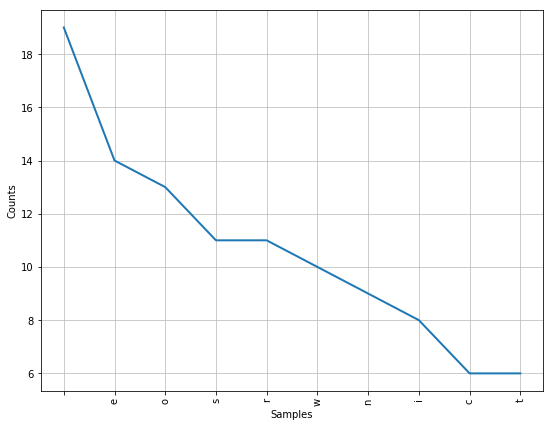

In [257]:
plt.figure(figsize = (9, 7))
fdist.plot(10)